In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import tensorflowjs as tfjs

Using TensorFlow backend.


In [2]:
# Path of Dataset
base_dir = 'D:/Agilan/Siemens-ML_AI/Project/Indian-Currency-Classifier/indian_currency_new_aug2'
train_dir = base_dir+'/training'
test_dir = base_dir+'/test'

In [3]:

# Specify the model's network

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [4]:

# Compile the Model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:

# Summarise the Model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 198, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 29440)             0

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:

# Read the Train dataset

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(100, 200),  # All images will be resized to 100x200
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1100 images belonging to 11 classes.


In [8]:

# Read the Test dataset

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(100, 200),
        batch_size=1,
        class_mode='categorical')

Found 275 images belonging to 11 classes.


In [9]:

# Train the model 

history = model.fit_generator(
      train_generator,
      steps_per_epoch=1100,
      epochs=8,
      validation_data=test_generator,
      validation_steps=275,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
1100/1100 [==============================] - 54s 49ms/step - loss: 2.4228 - accuracy: 0.0773 - val_accuracy: 0.0909 - val_loss: 2.3982
Epoch 2/8
1100/1100 [==============================] - 54s 49ms/step - loss: 2.4001 - accuracy: 0.0736 - val_accuracy: 0.0945 - val_loss: 2.3979
Epoch 3/8
1100/1100 [==============================] - 55s 50ms/step - loss: 2.3950 - accuracy: 0.0764 - val_accuracy: 0.0945 - val_loss: 2.3940
Epoch 4/8
1100/1100 [==============================] - 55s 50ms/step - loss: 2.3843 - accuracy: 0.1509 - val_accuracy: 0.2655 - val_loss: 2.0780
Epoch 5/8
1100/1100 [==============================] - 55s 50ms/step - loss: 1.7860 - accuracy: 0.4509 - val_accuracy: 0.6800 - val_loss: 1.1864
Epoch 6/8
1100/1100 [==============================] - 55s 50ms/step - loss: 0.9550 - accuracy: 0.7027 - val_accuracy: 0.8036 - val_loss: 0.7152
Epoch 7/8
1100/1100 [==============================] -

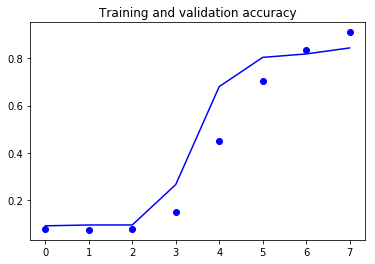

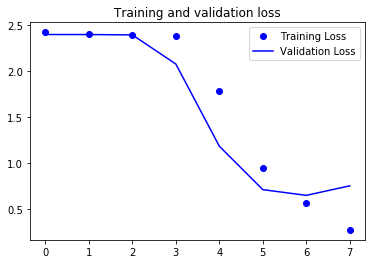

In [10]:

# Plot accuracy and loss during training and testing 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

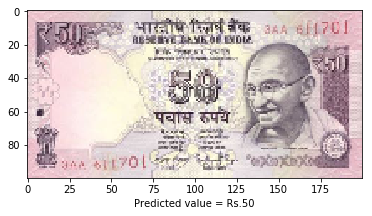

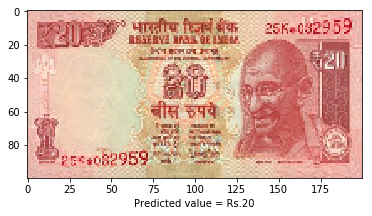

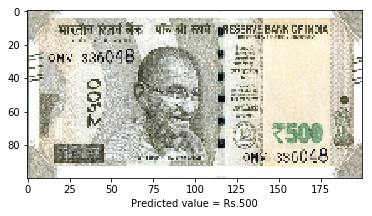

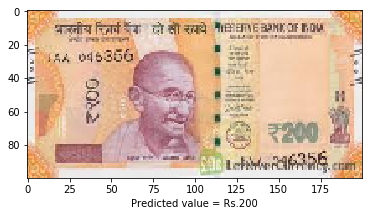

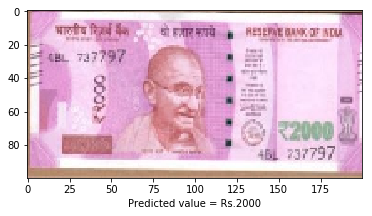

In [11]:

# Run-time test of the model by feeding images

for i in range(5):
    path = "D:/Agilan/Siemens-ML_AI/Project/Indian-Currency-Classifier/"+str(i+1)+".jpg"
    img = image.load_img(path, target_size=(100, 200))
    x = image.img_to_array(img)
    
    # Plot the loaded image
    plt.figure()
    plt.imshow(x/255)
    
    # Predict the value for loaded image
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    m = classes.argmax()
    if (m==0 or m==1):
     v="10"
    elif (m==2 or m==3):
     v="20"
    elif (m==4 or m==5):
     v="50"
    elif (m==6 or m==7):
     v="100"
    elif (m==8):
     v="200"
    elif (m==9):
     v="500"
    elif (m==10):
     v="2000"
    
    # Print the predicted value in the x-label of the image
    plt.xlabel("Predicted value = Rs." + v)


In [16]:

# Convert the keras model to tensorflow js module to use it in the web application

tfjs.converters.save_keras_model(model, "D:/Agilan/Siemens-ML_AI/Project/Indian-Currency-Classifier/tfjs/public/tfjs-new")